In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mc_df=pd.read_excel("mcdonalds.xlsx")

In [4]:
mc_df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
mc_df.tail(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [6]:
mc_df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

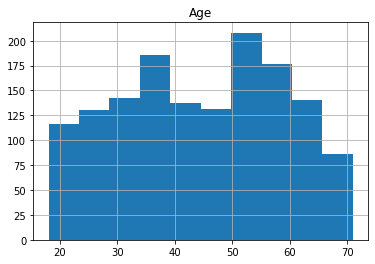

In [7]:
mc_df.hist()

In [14]:
mc_df = mc_df.replace('i hate it!-5', -5)
mc_df= mc_df.replace('i like it!+5',+5)


In [15]:
mc_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [16]:
mc_df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
cat_cols = ['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty','expensive','healthy','disgusting','VisitFrequency','Gender']

In [20]:
mc_df[cat_cols] = mc_df[cat_cols].apply(LabelEncoder().fit_transform)
mc_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [23]:
mc_df['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [37]:
X = mc_df.iloc[:,:-1]
# select all rows and all columns except the last one
X

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0


In [39]:
Y=mc_df.iloc[:,-1]# select all rows and only the last column
Y

0       0
1       0
2       0
3       0
4       1
       ..
1448    1
1449    0
1450    0
1451    1
1452    1
Name: Gender, Length: 1453, dtype: int32

In [40]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [41]:
pca = PCA(n_components=11)
pc = pca.fit_transform(X)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-16.606519,2.741963,2.662144,-0.069798,0.434919,-0.263014,-0.383694,-0.256191,-0.393692,-0.220755,0.122191
1,-6.311202,-1.726189,2.552675,0.240721,-0.602247,0.512667,-0.167021,-0.049187,-0.064749,-0.153515,-0.086661
2,-17.362201,-1.292938,2.532759,0.896763,-0.320552,0.385735,0.692249,-0.775453,-0.578003,0.456597,0.428089
3,-24.149503,-4.518576,-1.628762,-0.070141,-1.249760,0.181648,0.239766,0.874215,-0.016538,-0.135616,-0.281534
4,-4.321566,-1.365352,-0.438280,-0.429240,-0.469484,-0.672129,0.810892,-0.655735,-0.152661,-0.440302,0.097766
...,...,...,...,...,...,...,...,...,...,...,...
1448,-2.718124,5.875204,-2.145139,0.804396,-0.073992,0.047676,0.171599,0.124667,0.305339,-0.171791,0.308491
1449,8.667822,-0.819764,-1.362773,-0.502727,0.714241,0.356564,0.312928,0.027654,0.356029,-0.498590,0.778249
1450,-7.246323,-2.682460,-0.479225,0.951405,0.257748,0.152283,-0.518628,0.153660,-0.185255,-0.108680,-0.069336
1451,3.772036,-3.253993,2.526066,-0.565321,0.773073,0.089678,0.666070,-0.040125,0.165449,0.072548,-0.318568


In [42]:
pca.explained_variance_ratio_

array([9.35395382e-01, 4.33659261e-02, 1.41606789e-02, 1.85557024e-03,
       1.09162374e-03, 8.82948912e-04, 7.20073624e-04, 5.04525779e-04,
       4.41261685e-04, 3.71686585e-04, 3.45753516e-04])

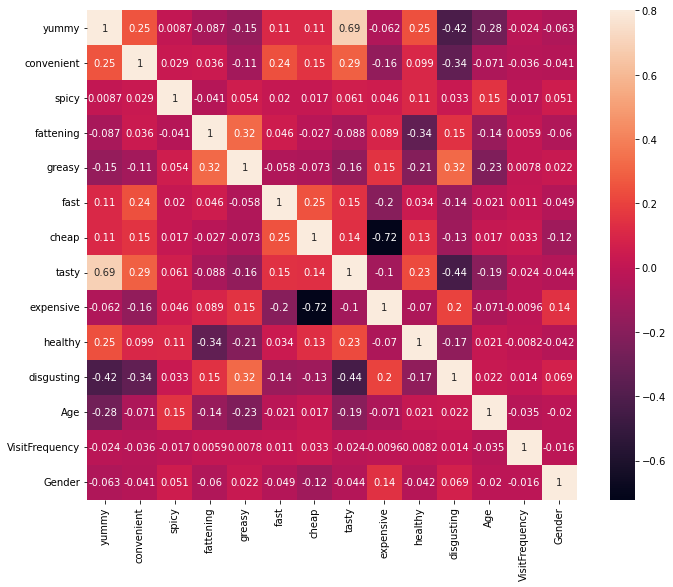

In [43]:
corrmat = mc_df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot = True, vmax=.8, square=True);
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
scaled_pf= scaler.fit_transform(X)

Text(0.5, 1.0, 'Dendogram')

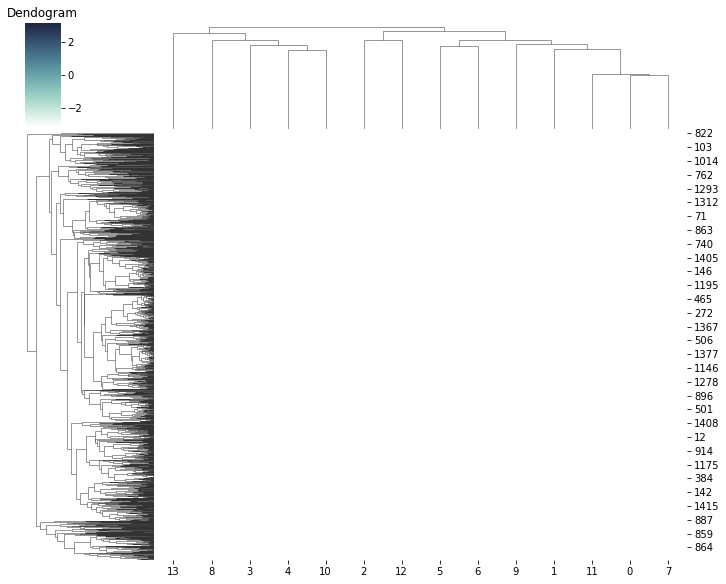

In [52]:
cmap= sns.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sns.clustermap(scaled_pf,cmap=cmap,linewidth=.2,figsize=(10,8));
plt.title("Dendogram")